# Importing the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score  
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, log_loss


# Data Loading

In [4]:
df = pd.read_csv("C:\\Users\\Dell\\Downloads\\archive\\Titanic-Dataset.csv" )
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data processing

In [8]:
df1 = df.drop(columns=['Name','Ticket'])
df1.shape

(891, 10)

In [9]:
df2 = df1.drop(columns='Cabin')
df2.dropna(subset=['Embarked'], axis=0, inplace=True)
df2.shape

(889, 9)

In [10]:
df3 = df2.fillna(df2.Age.mean())
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

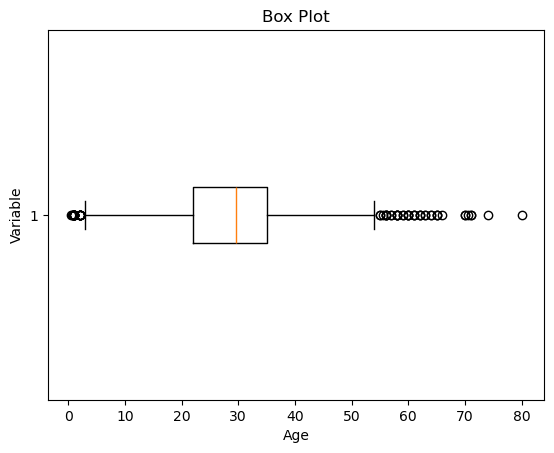

In [11]:
plt.boxplot(df3['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [12]:
mean = df3['Age'].mean()
std  = df3['Age'].std()

lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

df4 = df3[(df3['Age'] >= lower_bound) 
                & (df3['Age'] <= upper_bound)]

Lower Bound : 3.705400107925648
Upper Bound : 55.578785285332785


In [13]:
X = df3[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df3['Survived']

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))

num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X

x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_17996\1278113653.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S


In [15]:
x1['Sex'] = x1['Sex'].map({'male': 1, 'female': 0})
x1['Embarked'] = x1['Embarked'].replace({'C': 0, 'Q': 1, 'S': 2})
x1.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_17996\420989032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1['Sex'] = x1['Sex'].map({'male': 1, 'female': 0})
C:\Users\Dell\AppData\Local\Temp\ipykernel_17996\420989032.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x1['Embarked'] = x1['Embarked'].replace({'C': 0, 'Q': 1, 'S': 2})
C:\Users\Dell\AppData\Local\Temp\ipykernel_17996\420989032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1,0.271174,0.125,0.0,0.014151,2
1,0.0,0,0.472229,0.125,0.0,0.139136,0
2,1.0,0,0.321438,0.000,0.0,0.015469,2
3,0.0,0,0.434531,0.125,0.0,0.103644,2
4,1.0,1,0.434531,0.000,0.0,0.015713,2


In [16]:
x = x1.iloc[:, [2, 3]].values  
y = x1.iloc[:, 4].values   

In [17]:
print(x1.iloc[:, [2, 3, 4]].isnull().sum())

Age      0
SibSp    0
Parch    0
dtype: int64


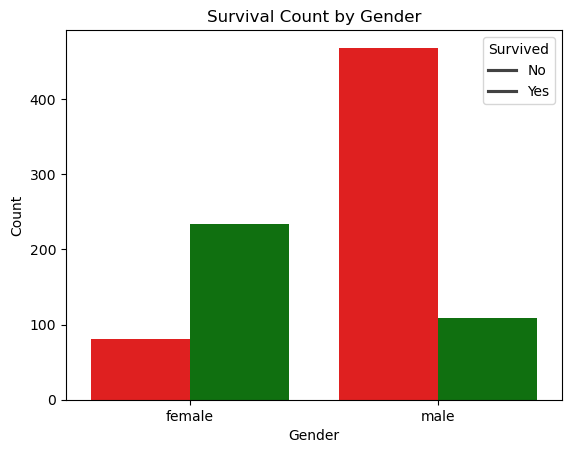

In [18]:
survival_counts = df.groupby(['Sex', 'Survived']).size().reset_index(name='Count')

# Create a bar plot
sns.barplot(data=survival_counts, x='Sex', y='Count', hue='Survived', palette={0: "red", 1: "green"})

# Add plot title and labels
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])

# Show the plot
plt.show()

# Logistic regression

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)  # Verify shapes

(711, 2) (178, 2) (711,) (178,)


In [21]:
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [22]:
y_train_binary = (y_train > 0.5).astype(int)  

In [23]:
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train_binary)  

LogisticRegression(random_state=0)

In [24]:
y_pred_probs = classifier.predict_proba(x_test)[:, 1]  
y_pred = (y_pred_probs > 0.5).astype(int)  

y_test_binary = (y_test > 0.5).astype(int)  

cm = confusion_matrix(y_test_binary, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[177   0]
 [  1   0]]


C:\Users\Dell\AppData\Local\Temp\ipykernel_17996\1916876090.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


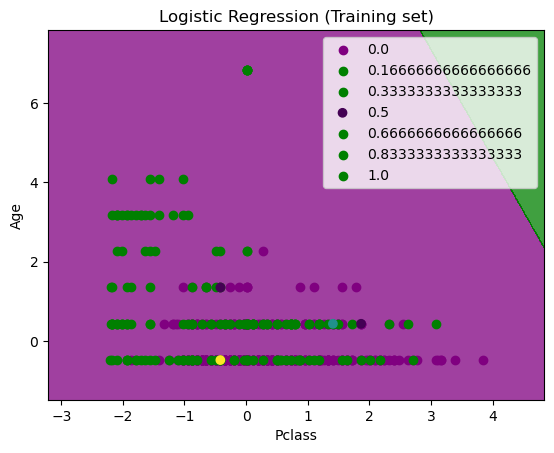

In [25]:
x_set, y_set = x_train, y_train

x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('purple', 'green'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Pclass')  
plt.ylabel('Age')    
plt.legend()
plt.show()

# Accuracy

In [27]:
accuracy = accuracy_score(y_test_binary, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.44%


# Random Forest classifier

In [29]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier on the training data
rf_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(x_test)

# Evaluate the model
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: {:.2f}%".format(accuracy * 100))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[178]]

Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       178

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
